In [5]:
import os
import warnings 
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np 
import pandas as pd 
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pwd

'C:\\Users\\Owner'

In [7]:
df = pd.read_csv(r'C:\\Users\\Owner\Desktop\AMZNa.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-08,76.779999,81.209999,76.290001,80.510002,80.510002,9162700
1,2008-08-11,80.180000,91.750000,79.779999,88.089996,88.089996,25070200
2,2008-08-12,87.320000,88.480003,86.099998,87.250000,87.250000,8026500
3,2008-08-13,86.279999,88.250000,84.540001,86.690002,86.690002,7208800
4,2008-08-14,85.709999,88.750000,85.220001,88.029999,88.029999,6901700
...,...,...,...,...,...,...,...
2863,2019-12-23,1788.260010,1793.000000,1784.510010,1793.000000,1793.000000,2136400
2864,2019-12-24,1793.810059,1795.569946,1787.579956,1789.209961,1789.209961,881300
2865,2019-12-26,1801.010010,1870.459961,1799.500000,1868.770020,1868.770020,6005400
2866,2019-12-27,1882.920044,1901.400024,1866.010010,1869.800049,1869.800049,6186600


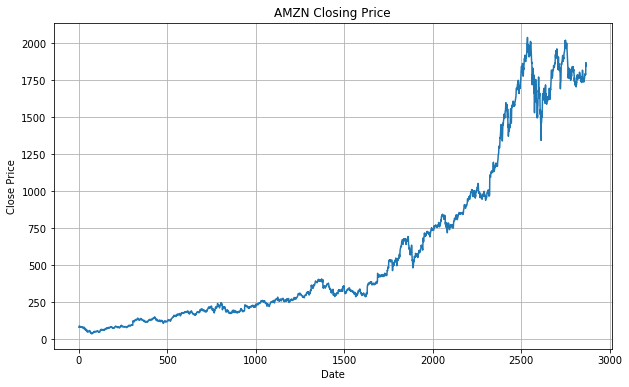

In [8]:
plt.figure(figsize = (10, 6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.title('AMZN Closing Price')
plt.show()

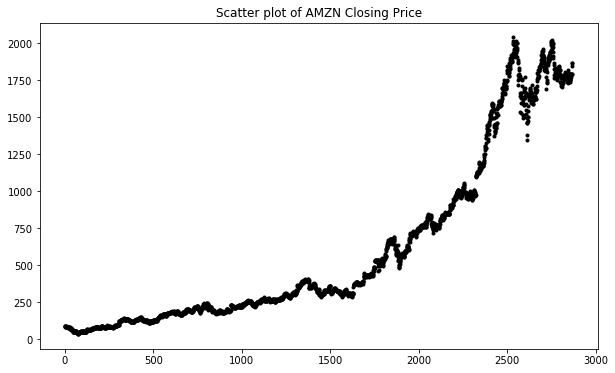

In [10]:
plt.figure(figsize = (10, 6))
df_close = df['Close']
df_close.plot(style = 'k.')
plt.title('Scatter plot of AMZN Closing Price')
plt.show()

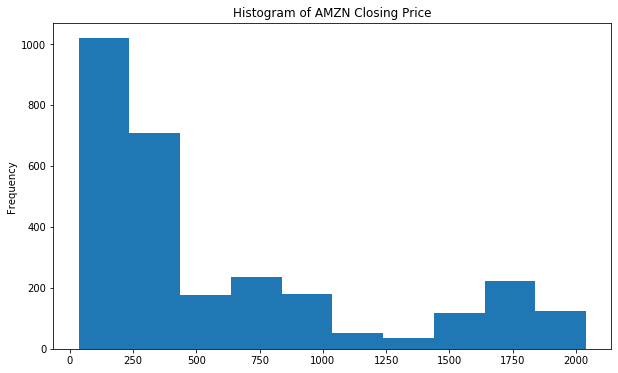

In [11]:
plt.figure(figsize = (10, 6))
df_close = df['Close']
df_close.plot(style = 'k.', kind = 'hist')
plt.title('Histogram of AMZN Closing Price')
plt.show()

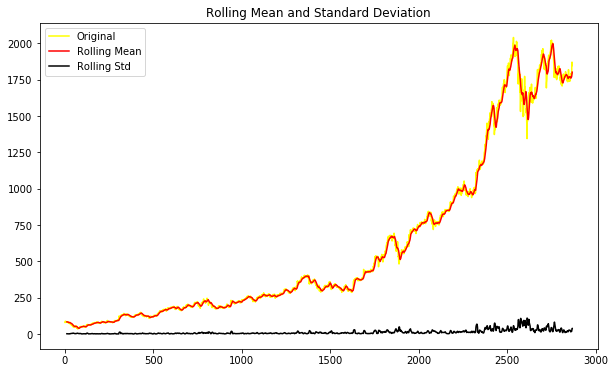

Results of dickey fuller test
Test Statistics                   0.899589
p-value                           0.993085
No. of lags used                 28.000000
Number of observations used    2839.000000
critical value (1%)              -3.432655
critical value (5%)              -2.862559
critical value (10%)             -2.567312
dtype: float64


In [13]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4], index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df['Close'])

<Figure size 720x432 with 0 Axes>

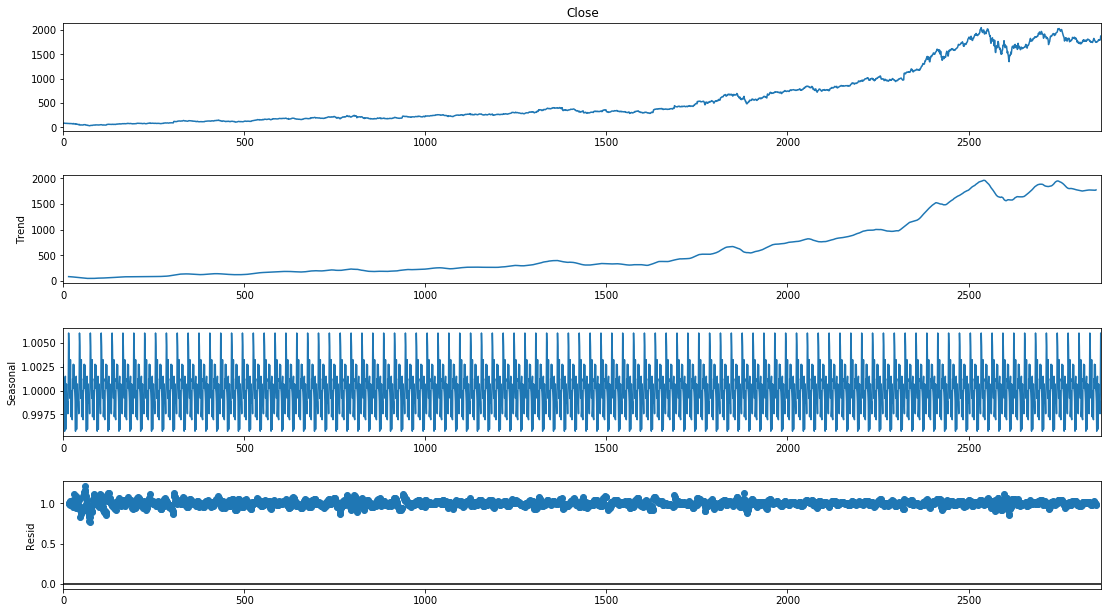

In [14]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


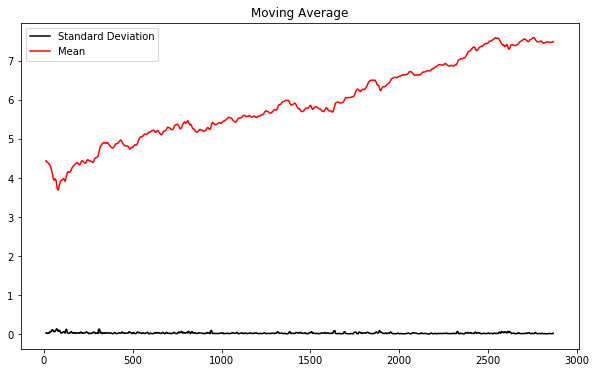

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend(loc = 'upper left')
plt.show()

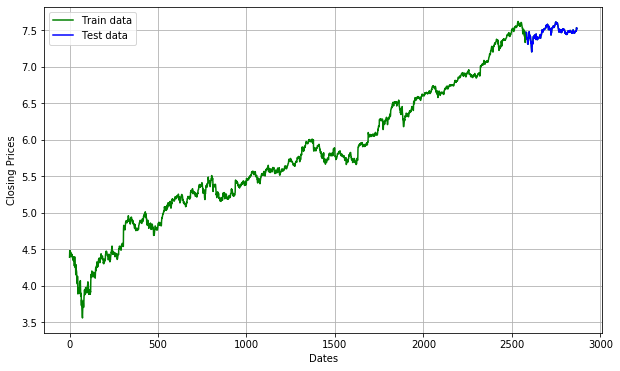

In [17]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [19]:
model = ARIMA(train_data, order=(3, 1, 2))
fitted = model.fit(disp=-1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2577
Model:                 ARIMA(3, 1, 2)   Log Likelihood                6047.414
Method:                       css-mle   S.D. of innovations              0.023
Date:                Tue, 12 Jan 2021   AIC                         -12080.827
Time:                        20:17:25   BIC                         -12039.846
Sample:                             1   HQIC                        -12065.972
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.000      2.740      0.006       0.000       0.002
ar.L1.D.Close    -0.0963      0.781     -0.123      0.902      -1.628       1.435
ar.L2.D.Close     0.3053      0.367     

In [20]:
model = ARIMA(train_data, order=(0, 1, 0))
fitted = model.fit(disp=-1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2577
Model:                 ARIMA(0, 1, 0)   Log Likelihood                6042.639
Method:                           css   S.D. of innovations              0.023
Date:                Tue, 12 Jan 2021   AIC                         -12081.277
Time:                        20:18:09   BIC                         -12069.569
Sample:                             1   HQIC                        -12077.033
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      2.498      0.012       0.000       0.002


In [23]:
fc, se, conf = fitted.forecast(287, alpha=0.05)  # 95% confidence

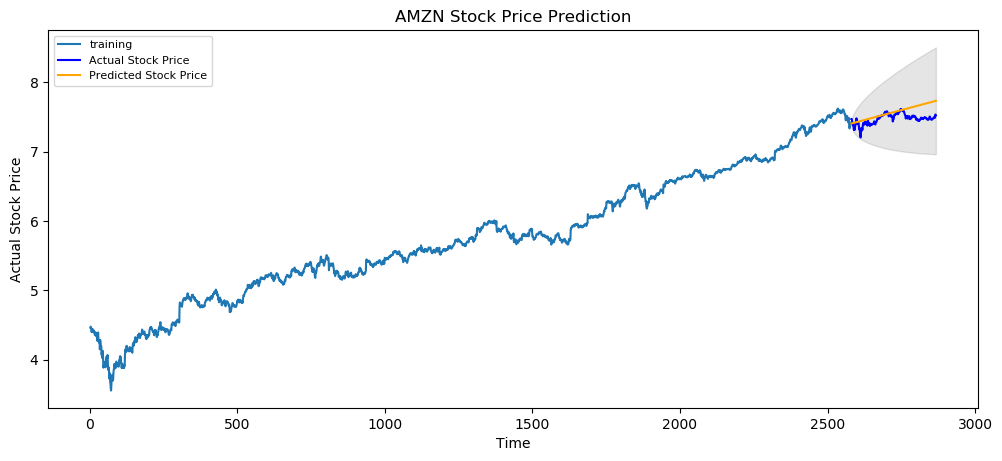

In [24]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()